In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg

In [ ]:
df = pd.read_csv("styles.csv",on_bad_lines='skip')

print(df.shape)

# Display basic information about the dataset
print(df.info())
print('\n'*5)
print(df.head())

(44424, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44424 entries, 0 to 44423
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  44424 non-null  int64  
 1   gender              44424 non-null  object 
 2   masterCategory      44424 non-null  object 
 3   subCategory         44424 non-null  object 
 4   articleType         44424 non-null  object 
 5   baseColour          44409 non-null  object 
 6   season              44403 non-null  object 
 7   year                44423 non-null  float64
 8   usage               44107 non-null  object 
 9   productDisplayName  44417 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 3.4+ MB
None






      id gender masterCategory subCategory  articleType baseColour  season  \
0  15970    Men        Apparel     Topwear       Shirts  Navy Blue    Fall   
1  39386    Men        Apparel  Bottomwear        Jeans       

Handle Missing Values

In [ ]:
# Check for missing values
print(df.isnull().sum())
print('\n'*5)
# Remove rows with missing production values
df_clean = df.dropna(subset=['baseColour'])
df_clean = df_clean.dropna(subset=['season'])
df_clean = df_clean.dropna(subset=['year'])
df_clean = df_clean.dropna(subset=['usage'])
df_clean = df_clean.dropna(subset=['productDisplayName'])
# print('\n'*5)
# Verify the cleaned dataset
print(df_clean.isnull().sum())


id                      0
gender                  0
masterCategory          0
subCategory             0
articleType             0
baseColour             15
season                 21
year                    1
usage                 317
productDisplayName      7
dtype: int64






id                    0
gender                0
masterCategory        0
subCategory           0
articleType           0
baseColour            0
season                0
year                  0
usage                 0
productDisplayName    0
dtype: int64


Summary Statistics

In [ ]:
# Summary statistics of numerical columns
print(df_clean.describe())

# Summary statistics of categorical columns
print(df_clean.describe(include=['object']))


                 id          year
count  44077.000000  44077.000000
mean   29550.577444   2012.782041
std    16974.233378      2.108119
min     1163.000000   2007.000000
25%    14722.000000   2011.000000
50%    28491.000000   2012.000000
75%    44407.000000   2015.000000
max    60000.000000   2019.000000
       gender masterCategory subCategory articleType baseColour  season  \
count   44077          44077       44077       44077      44077   44077   
unique      5              7          45         142         46       4   
top       Men        Apparel     Topwear     Tshirts      Black  Summer   
freq    22109          21366       15387        7066       9700   21440   

         usage            productDisplayName  
count    44077                         44077  
unique       8                         30806  
top     Casual  Lucera Women Silver Earrings  
freq     34397                            82  


Univariate Analysis


Frequency Table for gender
gender
Men       22109
Women     18357
Unisex     2126
Boys        830
Girls       655
Name: count, dtype: int64


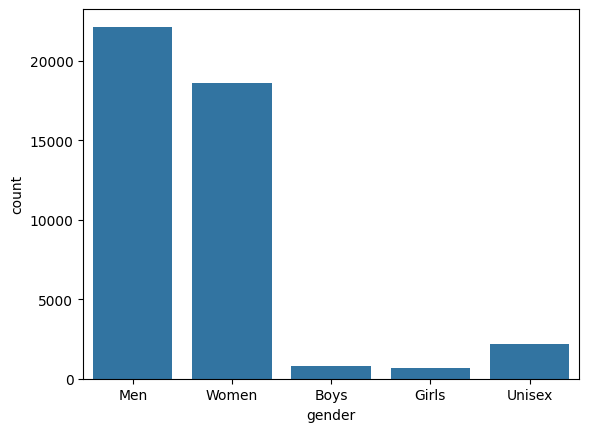


Frequency Table for masterCategory
masterCategory
Apparel           21366
Accessories       11244
Footwear           9197
Personal Care      2139
Free Items          105
Sporting Goods       25
Home                  1
Name: count, dtype: int64


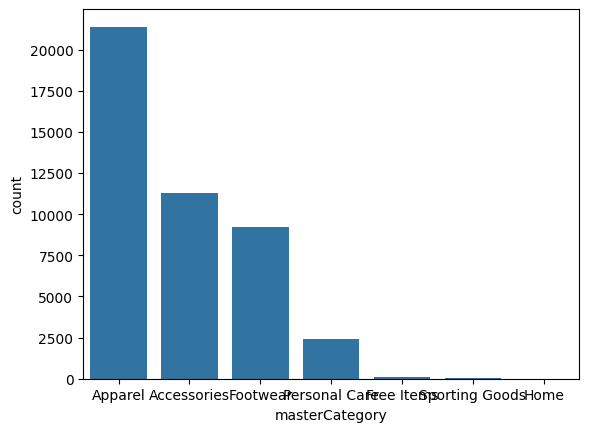


Frequency Table for subCategory
subCategory
Topwear                     15387
Shoes                        7323
Bags                         3053
Bottomwear                   2686
Watches                      2542
Innerwear                    1806
Jewellery                    1079
Eyewear                      1073
Fragrance                    1001
Sandal                        961
Wallets                       925
Flip Flops                    913
Belts                         811
Socks                         698
Dress                         478
Loungewear and Nightwear      464
Saree                         427
Lips                          425
Headwear                      293
Nails                         278
Makeup                        263
Ties                          258
Accessories                   129
Scarves                       118
Cufflinks                     108
Apparel Set                   106
Free Gifts                    104
Stoles                         90
Ski

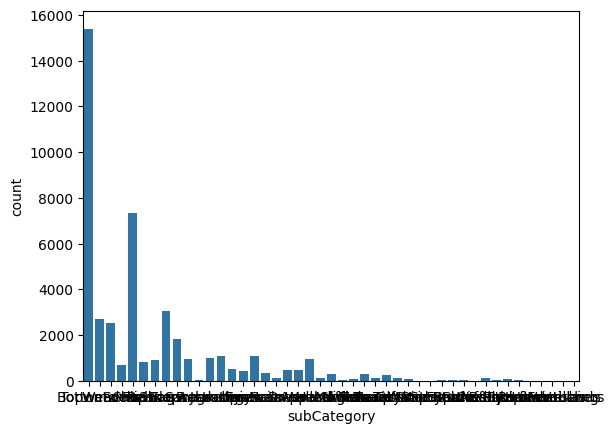


Frequency Table for articleType
articleType
Tshirts                7066
Shirts                 3214
Casual Shoes           2845
Watches                2542
Sports Shoes           2016
                       ... 
Shoe Laces                1
Mens Grooming Kit         1
Body Wash and Scrub       1
Suits                     1
Ipad                      1
Name: count, Length: 142, dtype: int64


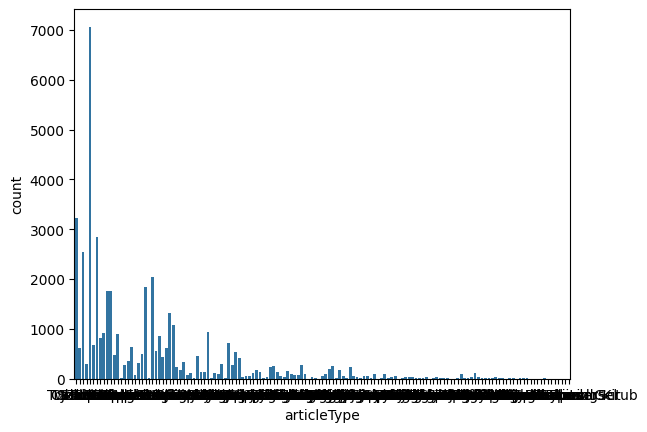


Frequency Table for baseColour
baseColour
Black                9700
White                5497
Blue                 4907
Brown                3440
Grey                 2735
Red                  2434
Green                2103
Pink                 1824
Navy Blue            1784
Purple               1612
Silver               1089
Yellow                776
Beige                 745
Gold                  621
Maroon                577
Orange                523
Olive                 409
Multi                 394
Cream                 384
Steel                 315
Charcoal              228
Peach                 185
Off White             182
Skin                  163
Lavender              160
Grey Melange          146
Khaki                 139
Magenta               128
Teal                  119
Tan                   112
Mustard                97
Bronze                 89
Copper                 83
Turquoise Blue         69
Rust                   65
Burgundy               44
Metallic             

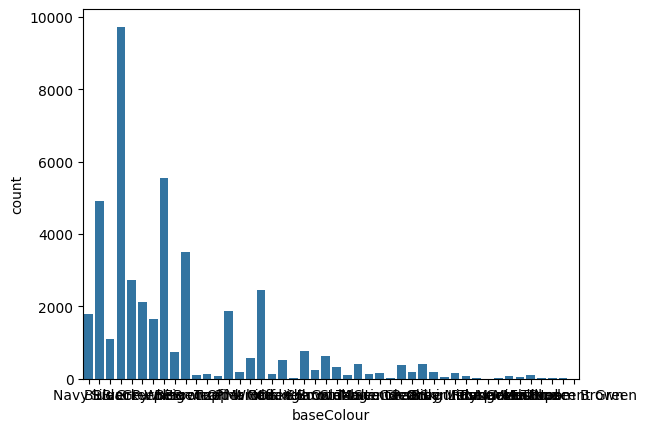


Frequency Table for season
season
Summer    21440
Fall      11414
Winter     8511
Spring     2712
Name: count, dtype: int64


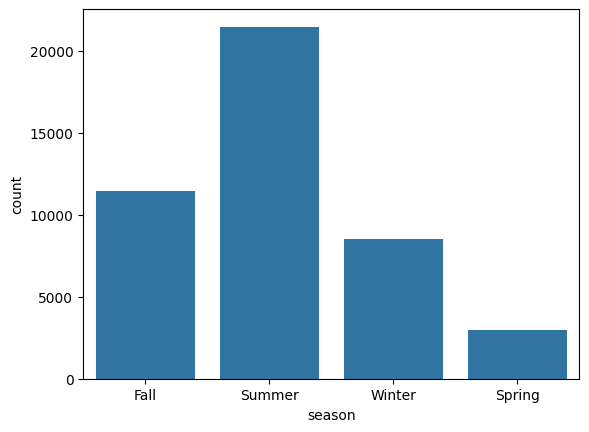


Frequency Table for usage
usage
Casual          34397
Sports           4004
Ethnic           3208
Formal           2345
Smart Casual       67
Party              29
Travel             26
Home                1
Name: count, dtype: int64


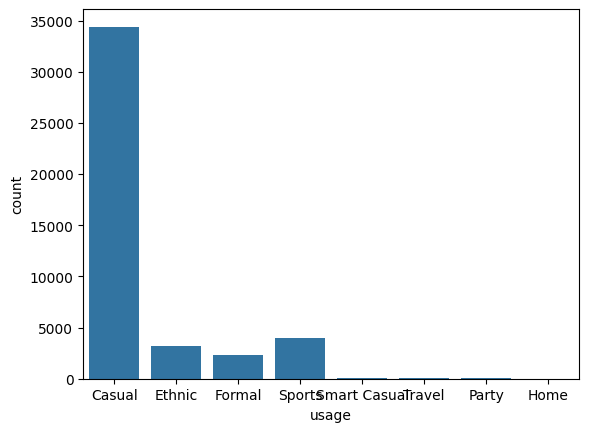


Descriptive Statistics for year
count    44077.000000
mean      2012.782041
std          2.108119
min       2007.000000
25%       2011.000000
50%       2012.000000
75%       2015.000000
max       2019.000000
Name: year, dtype: float64


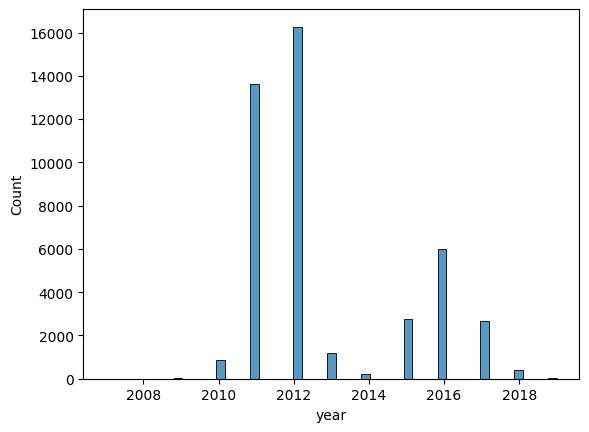

In [ ]:
for col in ['gender', 'masterCategory', 'subCategory', 'articleType', 'baseColour', 'season', 'usage']:
    print(f"\nFrequency Table for {col}")
    print(df_clean[col].value_counts())
    sns.countplot(x=col, data=df)  # Bar chart
    plt.show()

# Numerical variable (year)
print("\nDescriptive Statistics for year")
print(df_clean['year'].describe())
sns.histplot(df_clean['year'])  # Histogram
plt.show()


Bivariate Analysis


Crosstabulation between gender and masterCategory
masterCategory  Accessories  Apparel  Footwear  Free Items  Home  \
gender                                                             
Boys                     17      759        54           0     0   
Girls                    28      567        60           0     0   
Men                    4402    11341      5742          53     0   
Unisex                 1479       85       512           9     1   
Women                  5318     8614      2829          43     0   

masterCategory  Personal Care  Sporting Goods  
gender                                         
Boys                        0               0  
Girls                       0               0  
Men                       571               0  
Unisex                     15              25  
Women                    1553               0  


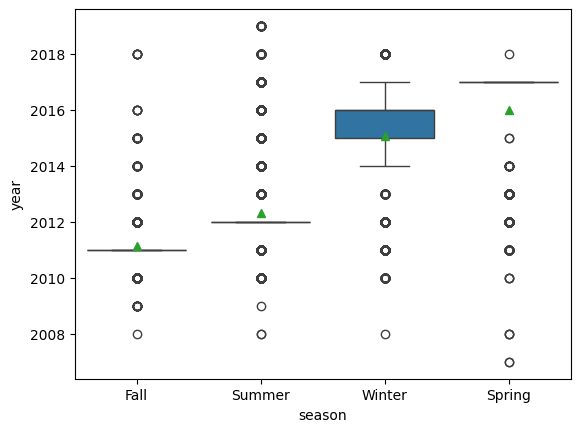

In [ ]:
print("\nCrosstabulation between gender and masterCategory")
print(pd.crosstab(df_clean['gender'], df_clean['masterCategory']))
sns.boxplot(x="season", y="year", showmeans=True, data=df_clean)  # Grouped boxplot
plt.show()

Cross-tabulate categorical variables to see the relationship between them.

masterCategory  Accessories  Apparel  Footwear  Free Items  Home  \
gender                                                             
Boys                     17      759        54           0     0   
Girls                    28      567        60           0     0   
Men                    4402    11341      5742          53     0   
Unisex                 1479       85       512           9     1   
Women                  5318     8614      2829          43     0   

masterCategory  Personal Care  Sporting Goods  
gender                                         
Boys                        0               0  
Girls                       0               0  
Men                       571               0  
Unisex                     15              25  
Women                    1553               0  


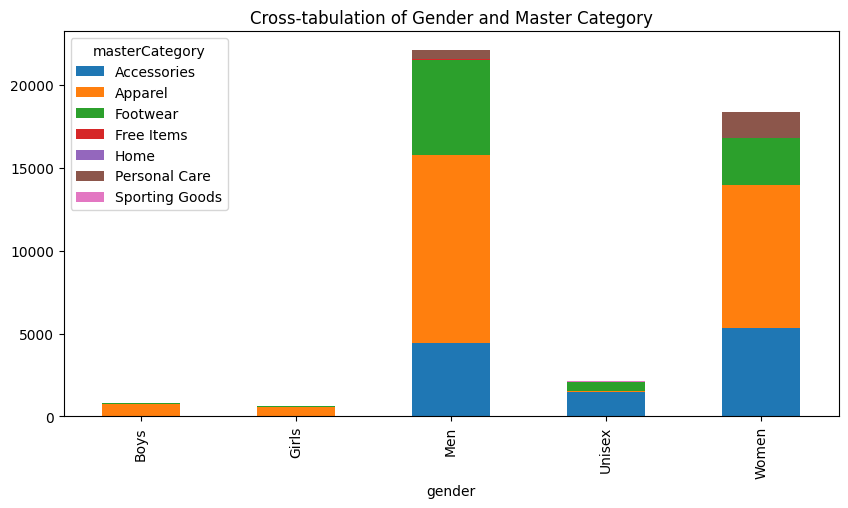

In [ ]:
# Cross-tabulation example
cross_tab = pd.crosstab(df_clean['gender'], df_clean['masterCategory'])
print(cross_tab)

# Visualize the cross-tabulation
cross_tab.plot(kind='bar', figsize=(10, 5), stacked=True)
plt.title('Cross-tabulation of Gender and Master Category')
plt.show()

Gender Distribution

In [ ]:
import plotly.express as px

fig = px.pie(df_clean, df_clean['gender'],color_discrete_sequence=px.colors.sequential.dense, opacity=0.9)
fig.show()

Master Category Distribution

In [ ]:
import plotly.graph_objects as go

catcounts = pd.value_counts(df_clean['masterCategory'])
fig = go.Figure([go.Bar(x=catcounts.index, y=catcounts.values ,text=catcounts.values, marker_color=px.colors.sequential.Aggrnyl)])
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.show()

Sub Category Distribution

In [ ]:
catcounts=pd.value_counts(df_clean['subCategory'])
fig = go.Figure([go.Bar(x=catcounts.index, y=catcounts.values ,text=catcounts.values, marker_color=px.colors.sequential.Aggrnyl)])
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.show()

Article Type Distribution

In [ ]:
catcounts=pd.value_counts(df_clean['articleType'])
fig = go.Figure([go.Bar(x=catcounts.index, y=catcounts.values ,text=catcounts.values, marker_color=px.colors.sequential.Aggrnyl)])
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.show()

Season Distribution

In [ ]:
seasons=pd.value_counts(df_clean['season'])

fig = go.Figure(data=[go.Scatter(
    x=seasons.index, y=seasons.values,
    mode='markers',
    marker=dict(
        color=px.colors.sequential.Aggrnyl,
        opacity=[1, 0.8, 0.6, 0.4],
        size=[40, 60, 80, 100])
)]
               )

fig.show()


Usage Distribution

In [ ]:
catcounts=pd.value_counts(df_clean['usage'])
fig = go.Figure([go.Bar(x=catcounts.index, y=catcounts.values ,text=catcounts.values, marker_color=px.colors.sequential.Aggrnyl)])
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.show()

Base Colour Distribution

In [ ]:
catcounts=pd.value_counts(df_clean['baseColour'])
fig = go.Figure([go.Bar(x=catcounts.index, y=catcounts.values ,text=catcounts.values, marker_color=px.colors.sequential.Aggrnyl)])
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.show()

In [ ]:
import plotly.express as px

# Interactive count plot
fig = px.histogram(df_clean, x='masterCategory', color='gender', barmode='group', title='Master Category by Gender')
fig.show()



clustering to find natural groupings in your data

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



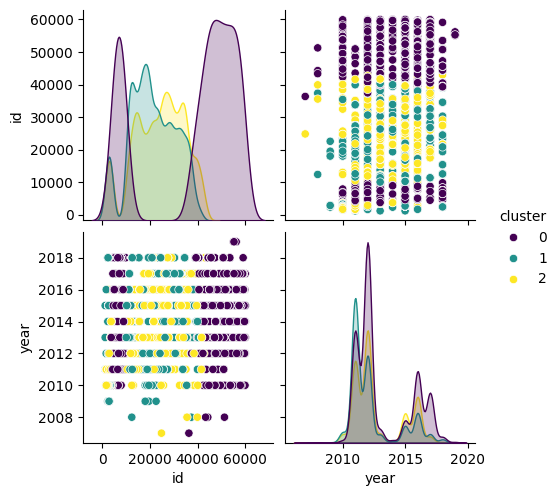

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

# Encode categorical variables
data_encoded = df_clean.copy()
for column in categorical_columns:
    data_encoded[column] = LabelEncoder().fit_transform(data_encoded[column].astype(str))

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=0).fit(data_encoded[categorical_columns])
df_clean['cluster'] = kmeans.labels_

# Visualize clusters
sns.pairplot(df_clean, hue='cluster', palette='viridis')
plt.show()
